# Objective

Objective is to perform a Preliminary Data Analysis by exploring cardio fitness data set - "CardioGoodFitness.csv" and perform the below analysis --
1. Come up with a customer profile (characteristics of a customer) of the different products.
2. Perform uni-variate and multi-variate analyses.
3. Generate a set of insights and recommendations that will help the company in targeting new customer.

## Data structure
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

    Product - the model no. of the treadmill
    Age - in no of years, of the customer
    Gender - of the customer
    Education - in no. of years, of the customer
    Marital Status - of the customer
    Usage - Avg. # times the customer wants to use the treadmill every week
    Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
    Income - of the customer
    Miles- expected to run

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [2]:
import warnings
warnings.filterwarnings('ignore') #to avoid warnings

In [3]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

### Read the dataset

In [4]:
mydata = pd.read_csv('CardioGoodFitness.csv')

In [5]:
# create a copy of this data to avoid changes in the original data
cgf = mydata.copy()

### View the dataset

In [6]:
# view first 5 rows of the data - "fit"
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Observations**
* Variables - 'Product', 'Gender' and 'MaritalStatus' are categorical variables. 
* Remaining all the variables are numericals.

### Check the shape of the dataset

In [7]:
cgf.shape

(180, 9)

* The dataset has 180 rows and 9 columns.

### Check the dataset info

In [8]:
cgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**
* There are no null values in this dataset

### Five-point summary of the dataset

In [9]:
cgf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


**Observations**
* Product variable has 3, Gender has 2 and MaritalStatus has 2 unique categories.
* The most bought product is TM195.
* There are more number of Male customers than females.
* There are more married customers than single ones.
* 75% of customers are below 33 years of age

We will further explore in univariate analysis

# Exploratory Data Analysis

## Univariate analysis

In [10]:
def hist_box(mycol):
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)}
    )

    # boxplot on top
    sns.boxplot(x=mycol, ax=ax_box, showmeans=True, color='red')
    ax_box.set(xlabel='')   # no label on top axis

    # histogram below
    sns.histplot(x=mycol, kde=False, ax=ax_hist, color='blue', alpha=0.5)

    # mean (green dashed) and median (black solid)
    ax_hist.axvline(np.mean(mycol),   color='g', linestyle='--')
    ax_hist.axvline(np.median(mycol), color='black', linestyle='-')

    # x-axis label from column name (e.g. Age)
    ax_hist.set_xlabel(getattr(mycol, "name", ""))

    plt.tight_layout()
    plt.show()

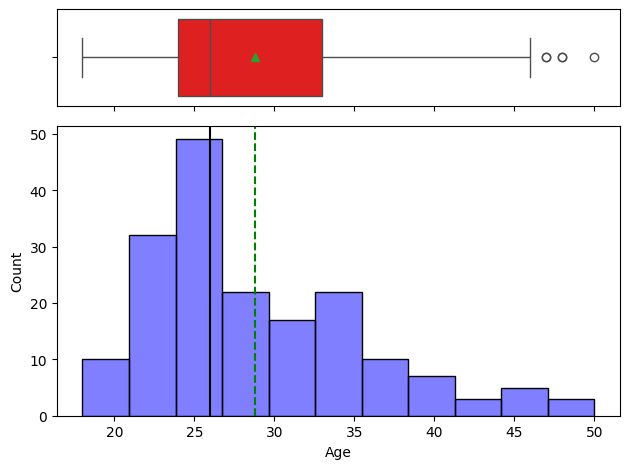

In [11]:
hist_box(cgf.Age)

**Observations**
* The distribution of Age is right skewed.
* Majority of customers are aged between 21 to 35.
* There are very less outliers.

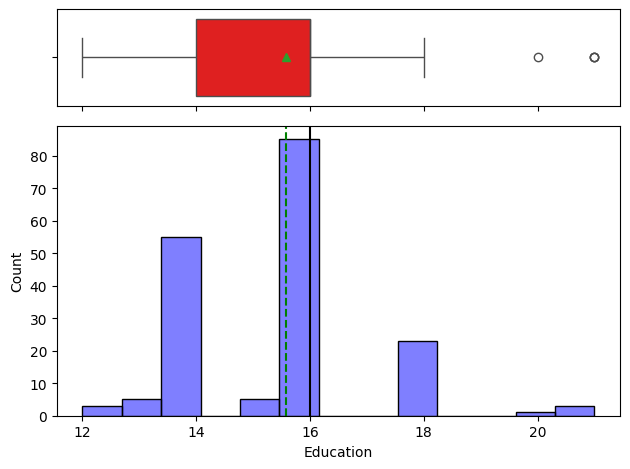

In [12]:
hist_box(cgf.Education)

**Observations**
* CUstomers have an average of 15 years of education.

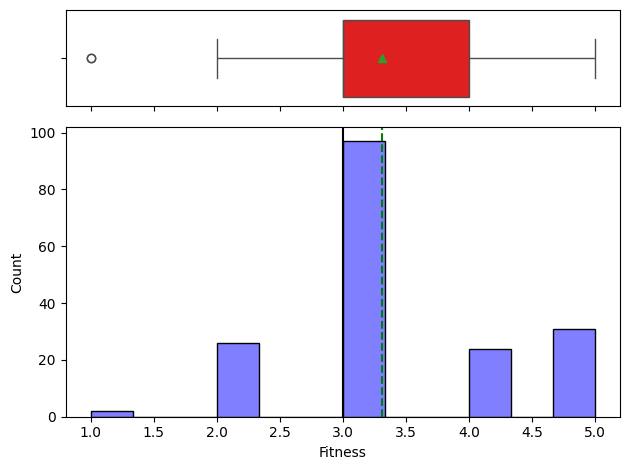

In [13]:
hist_box(cgf.Fitness)

**Observations**
* Average self-rating of customers is 3.3 with approximately 60% of customers.
* This implies that customers are decently fit.

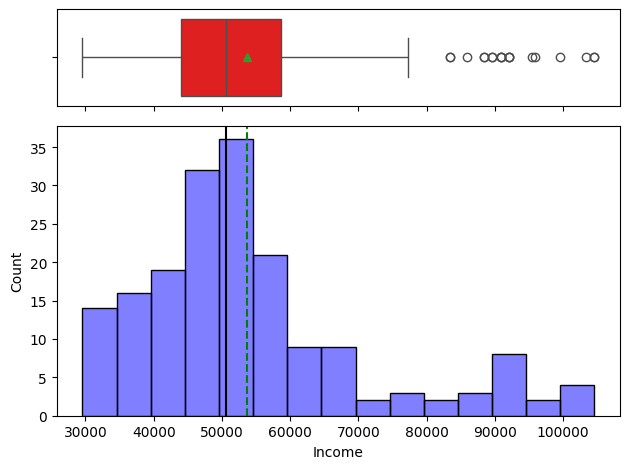

In [14]:
hist_box(cgf.Income)

**Observations**
* Income is skewed to right.
* There are many outliers with higher ioncome range.
* Mean is quite close to median, indicating that 50% of customers have income approximately same as the average income - 53K.

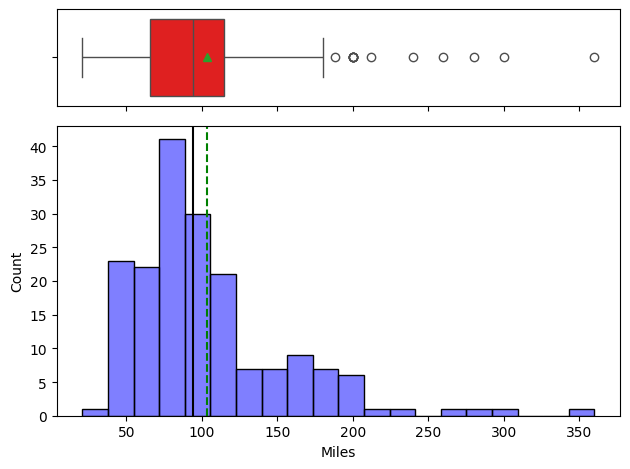

In [15]:
hist_box(cgf.Miles)

**Observations**
* Miles is also right skewed, indicating some outliers.
* 50% of cusotmers expect to run approximately 94 miles.

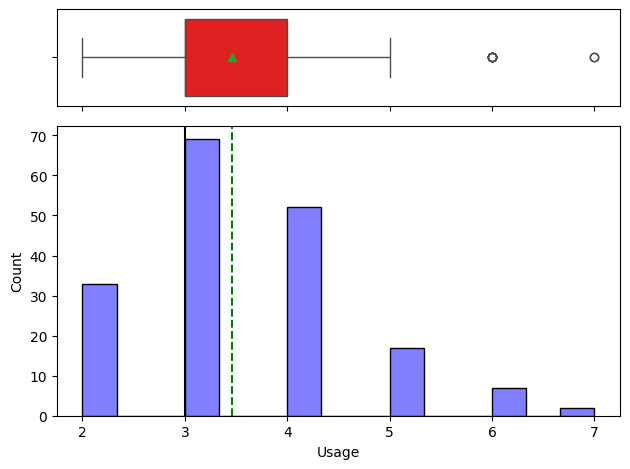

In [16]:
hist_box(cgf.Usage)

**Observations**
* Usage is indicating a right skew.
* 50% of customers plan to use the treadmill 3-4 times a week.

### Exploring the categorical variables

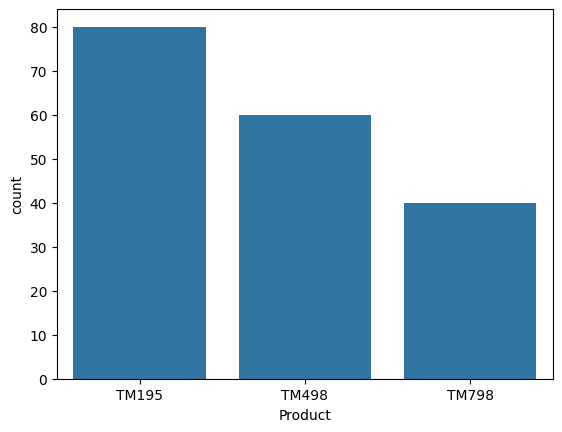

In [17]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='Product', data=cgf)
plt.show()

**Observations**
* Close to 80 customers have bought TM195, which is approx 44% amking it most preferred product.

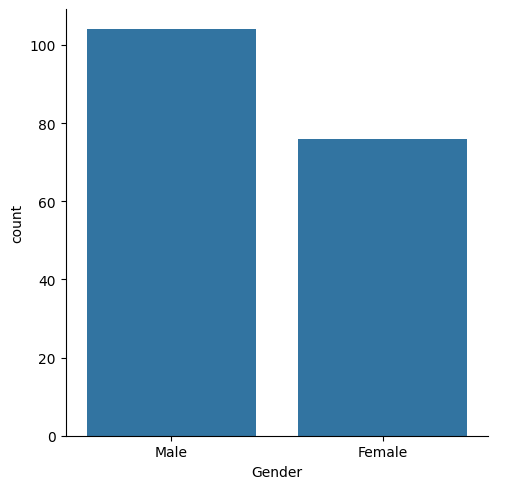

In [18]:
# Gender distribution
sns.catplot(x='Gender', data=cgf, kind='count')
plt.show()


**Observations**
* THere are more Male customers than females.

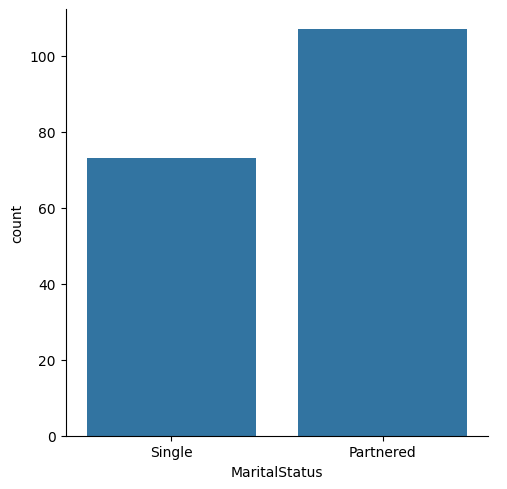

In [19]:
# Marital status distribution
sns.catplot(x='MaritalStatus', data=cgf, kind='count')
plt.show()

**Observations**
* There are more married customers than single ones.

## Multi-variate Analysis

### Finding the correlation

In [20]:
# slice out the numerical variabales from dataset to check the correlation between the numericals.

fit_num = cgf.select_dtypes(include='int64')
fit_num.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


In [21]:
corr = fit_num.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


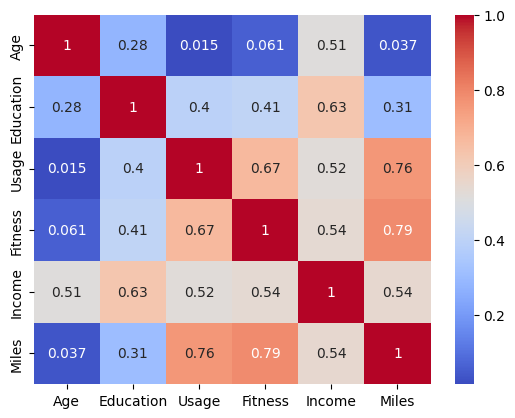

In [22]:
# plot the heatmap to analyse the correlation between all the numerical variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Observations**
* Fitness, Miles & Usage have high correlation with each other.
* Income has a good correlation with Education.
* Income is also correlated with all the other variables.

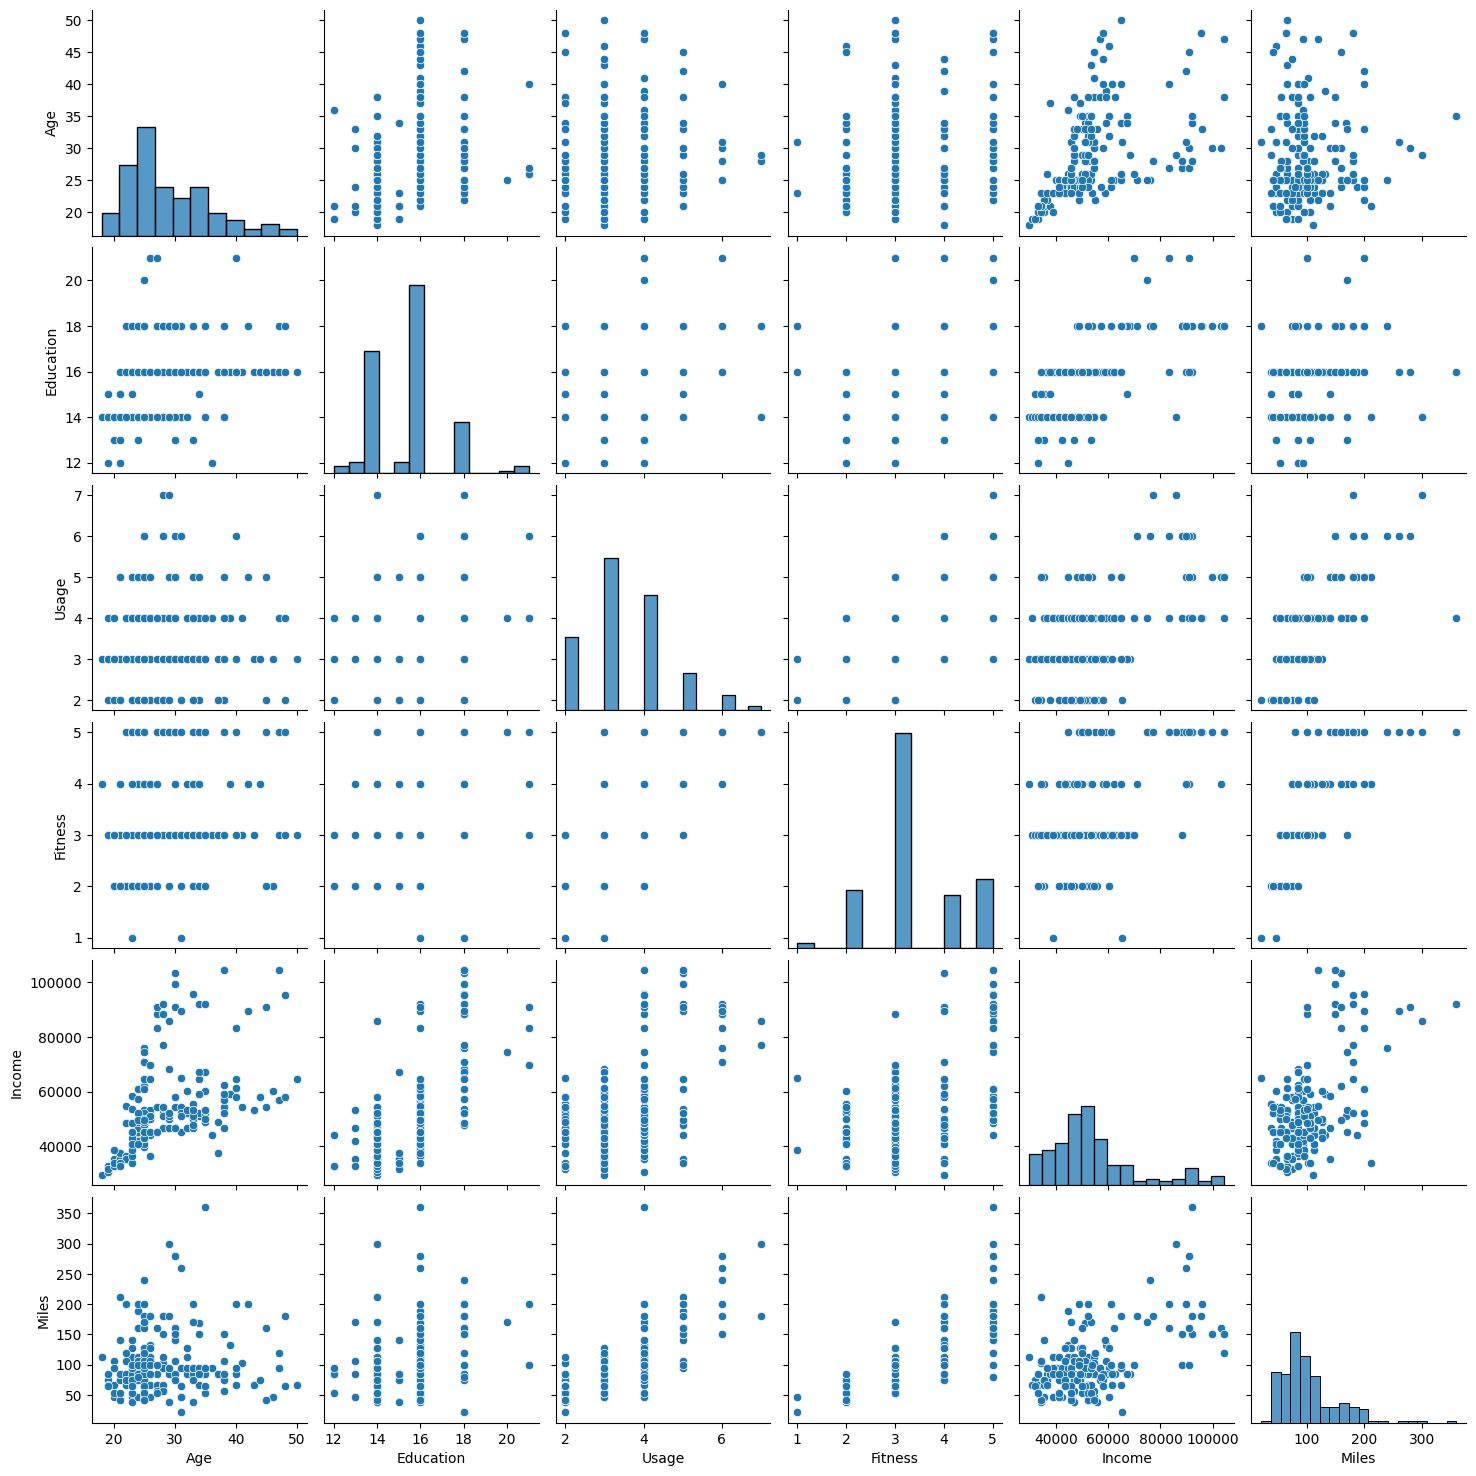

In [23]:
# Looking at relations between the numerical variables
sns.pairplot(cgf)

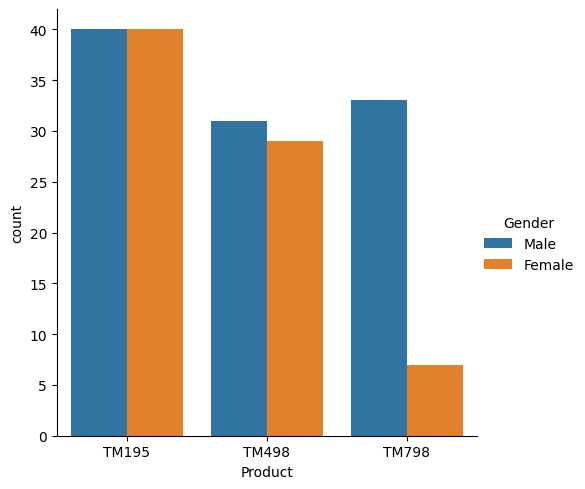

In [24]:
# Analyze how Gender affects product preference
sns.catplot(x='Product', data=cgf, hue='Gender', kind='count')
plt.show()

**Observations**
* TM195 is the most preferable choice for both Male & Female customers.
* TM798 is mostly bought by Male customers.

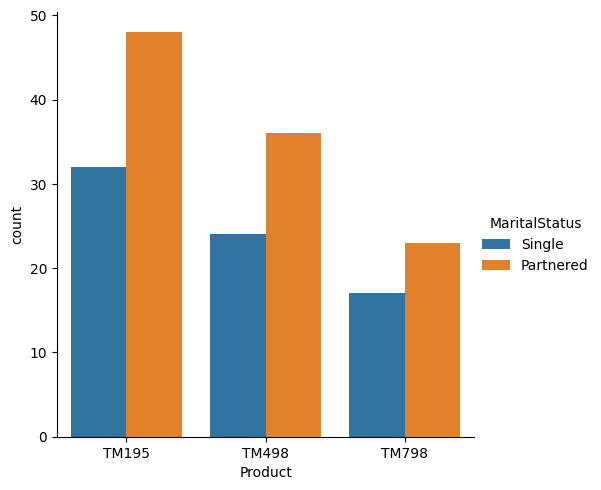

In [25]:
# Analyze how MaritalStatus affects product preference
sns.catplot(x='Product', data=cgf, hue='MaritalStatus', kind='count')
plt.show()

**Observations**
* Chances for Partnered people to buy a treadmill is higher than Single people.

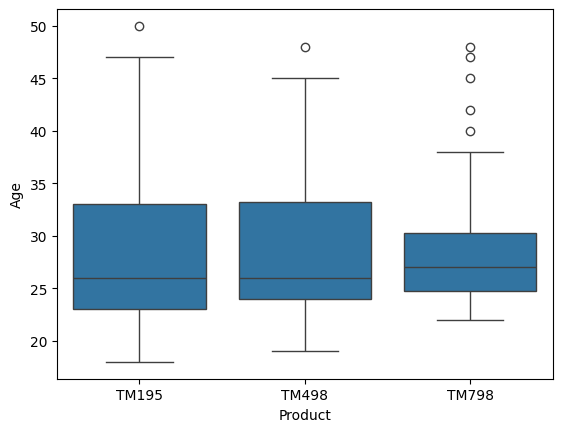

In [26]:
# Analyze the age distribution for each product.
sns.boxplot(x='Product', y='Age', data=cgf)
plt.show()

**Observations**

* TM798 has a comparatively smaller age range (23-37 years of age) with some outliers (40-47yrs).
* TM195 & TM498 have a similar age range of customers.

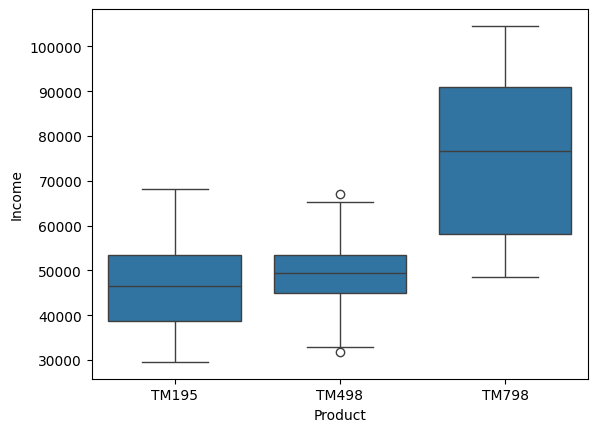

In [27]:
# Analyse the affect of income range on product preference.
sns.boxplot(x='Product', y='Income', data=cgf)
plt.show()

**Observations**

* Customers with high-income range prefer TM798. Customers with low-income prefer either TM195 or TM498.

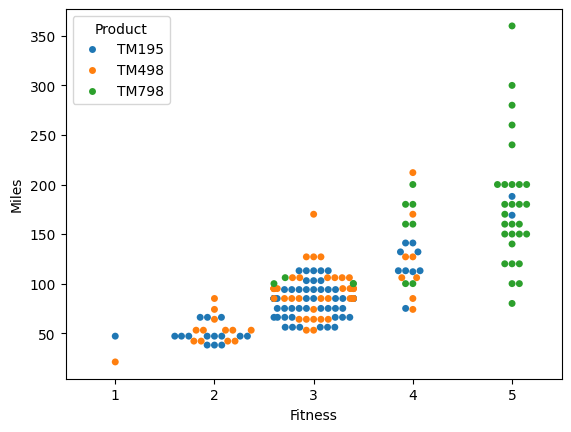

In [28]:
# Analyse how fitness rating & no:of miles they target to run are affecting their product preference.
sns.swarmplot(x='Fitness', y='Miles', data=cgf, hue='Product')
plt.show()

**Observations**

* Customers with higher fitness level expect to run more miles and mostly prefer TM798.
* Customers around avegrage fitness rating prefer TM195 & TM498

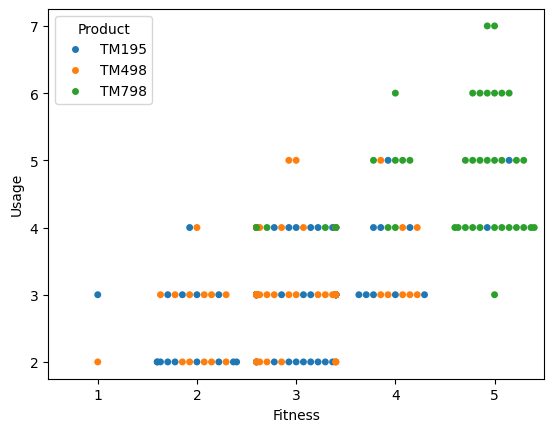

In [29]:
# Analyse how education & income affect product prefernce of customers.
sns.swarmplot(x='Fitness', y='Usage', data=cgf, hue="Product")
plt.show()

**Observations**

* Customers with high fitness ratings use the treadmills more times in a week.
* TM798 is preferred by customers who have high fitness ratings and high usage.
* TM195 & TM498 users plan to use 2-3 times.

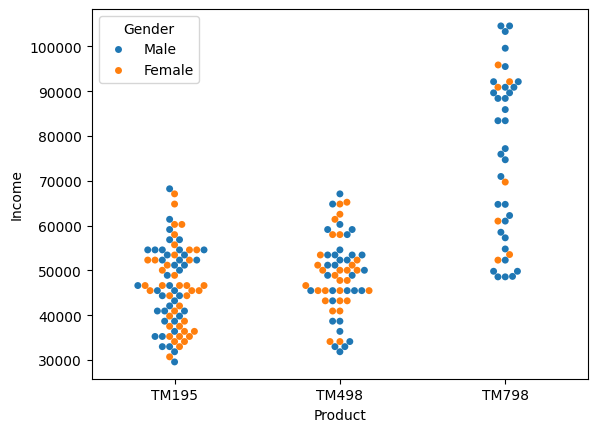

In [30]:
# Analyse income as per the gender and how they affect product preference.
sns.swarmplot(x='Product', y='Income', data=cgf, hue='Gender')
plt.show()

**Observations**

* Male cusotmers have comparatively higher income than Females and so are more likely to buy TM798.

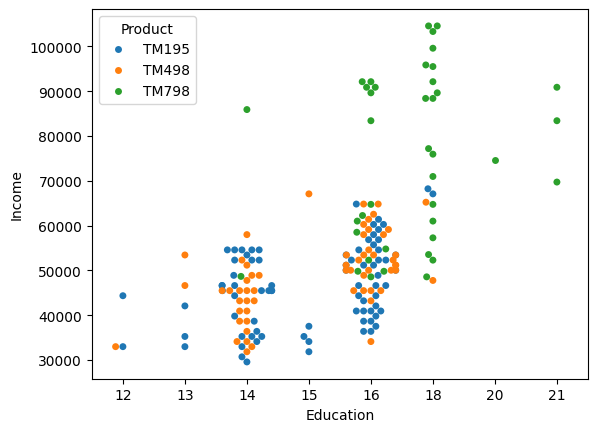

In [31]:
sns.swarmplot(x='Education', y="Income", data=cgf, hue='Product')
plt.show()